# **제주항공 내국인 입국과 제주도소상공인 실적 및 전망과 예측 보고서**

### <div align="right">**4조(박수민,이동호,이바다,이지민)**</div>



---

## 📌 목차
### **[1. 코드 분석](#코드-분석)**
### **[2. 시각화를 통한 그래프 분석](#시각화를-통한-그래프-분석)**
### **[3. 분석 결과 해석](#분석-결과-해석)**

---

## **코드 분석**

In [1]:
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from prophet import Prophet

Text(0.3, 0.3, '한글')

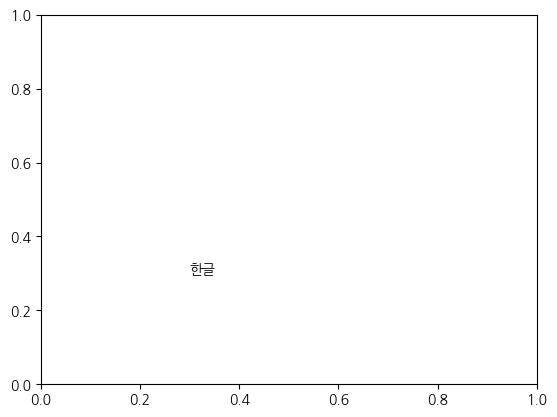

In [2]:
#CSV 파일 불러오기
file_path = "./출입국_제주.csv"
file2_path = "./소상공인지역별실적및전망_20250305.csv"


#판다스를 이용해 CSV파일을 데이터프레임으로 로드
ori = pd.read_csv(file_path, encoding = 'EUC-KR')
ori2 = pd.read_csv(file2_path, encoding = 'EUC-KR')


#윈도우용 폰트 경로 설정

path="C:\\Windows\\Fonts\\NanumGothic.ttf"

#Font Propertiy를 생성 후, matplotlib에 적용
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.3,0.3,'한글')

In [3]:
#깊은 복사하여 새로운 메모리 공간에 복사 ,원본에 영향 비치지 않음
#data1 = ori.copy()                       #제주공항 내국인 입국 데이터
data2 = ori2.copy()                      #제주소상공인 실적및전망 데이터


In [4]:
ex1_data = ori.copy()                    #원본(ori)의 깊은 복사 생성

#컬럼명 변경
ex1_data.columns = ["airport","type1","gender","year","type2","value"]
# ex1_data.rename(columns=("",""))
ex1_data

,airport,type1,gender,year,type2,value
0,제주,내국인,남자,2018,입국자,575
1,제주,내국인,남자,2019,입국자,545
2,제주,내국인,남자,2020,입국자,445
3,제주,내국인,남자,2021,입국자,1
4,제주,내국인,남자,2022,입국자,116
5,제주,내국인,남자,2023,입국자,176
6,제주,내국인,여자,2018,입국자,773
7,제주,내국인,여자,2019,입국자,726
8,제주,내국인,여자,2020,입국자,543
9,제주,내국인,여자,2021,입국자,0


In [5]:
filter1 = ex1_data['type1']=='내국인'      #필터링 조건을 생성, 출입국 유형 내국인만 선택
ex2_data = ex1_data[filter1].copy()        #필터링 된 데이터를 새로운 데이터 프레임 ex2_data에 저장
ex2_data.head()                            #상위 5개 데이터 출력

,airport,type1,gender,year,type2,value
0,제주,내국인,남자,2018,입국자,575
1,제주,내국인,남자,2019,입국자,545
2,제주,내국인,남자,2020,입국자,445
3,제주,내국인,남자,2021,입국자,1
4,제주,내국인,남자,2022,입국자,116


In [6]:
#year 컬럼을 기준으로 데이터 그룹화, 연도별(value)의 총합 계산, 이름 total로 재지정
ex1_data = ex1_data.groupby('year')['value'].sum().reset_index(name='total')
ex1_data.head(10)

,year,total
0,2018,14768
1,2019,11974
2,2020,2312
3,2021,1
4,2022,887
5,2023,8403


<Axes: title={'center': '2010-2023년 제주 입출국 내국인 차트'}>

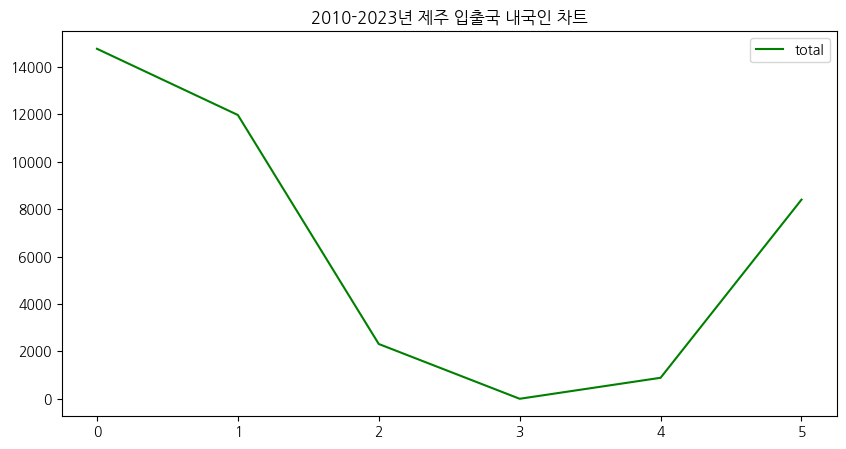

In [7]:
#그래프 시각화
ex1_data.plot(y='total', figsize=(10, 5), title="2010-2023년 제주 입출국 내국인 차트", color='green')

In [8]:
from prophet import Prophet  # 페이스북이 개발한 시게열 예측 모델인 Prophet 라이브러리 임포트

In [9]:
ex2_data = ex1_data.copy()

# 'year' 값이 연도(YYYY)로 저장되어 있으므로, 이를 datetime 형식으로 변환
ex2_data['year'] = pd.to_datetime(ex2_data['year'], format="%Y")

# Prophet 문법으로 컬럼명을 바꿈
ex2_data = ex2_data.rename(columns={'year':'ds','total':'y'})
# 'ds': 날짜 컬럼 (Datetime 형식)
# 'y' : 예측할 값

ex2_data.tail()

,ds,y
1,2019-01-01,11974
2,2020-01-01,2312
3,2021-01-01,1
4,2022-01-01,887
5,2023-01-01,8403


In [10]:
m = Prophet()                #모델 생성
m.fit(ex2_data)              #모델 학습

09:00:59 - cmdstanpy - INFO - Chain [1] start processing
09:00:59 - cmdstanpy - INFO - Chain [1] done processing


C:\Dev\Lang\Python313\Lib\site-packages\prophet\plot.py:94: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_6016\3391629067.py:6: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.savefig("./chart/제주예측.png")                      #예측 그래프를 PNG 파일로 저장
C:\Dev\Lang\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


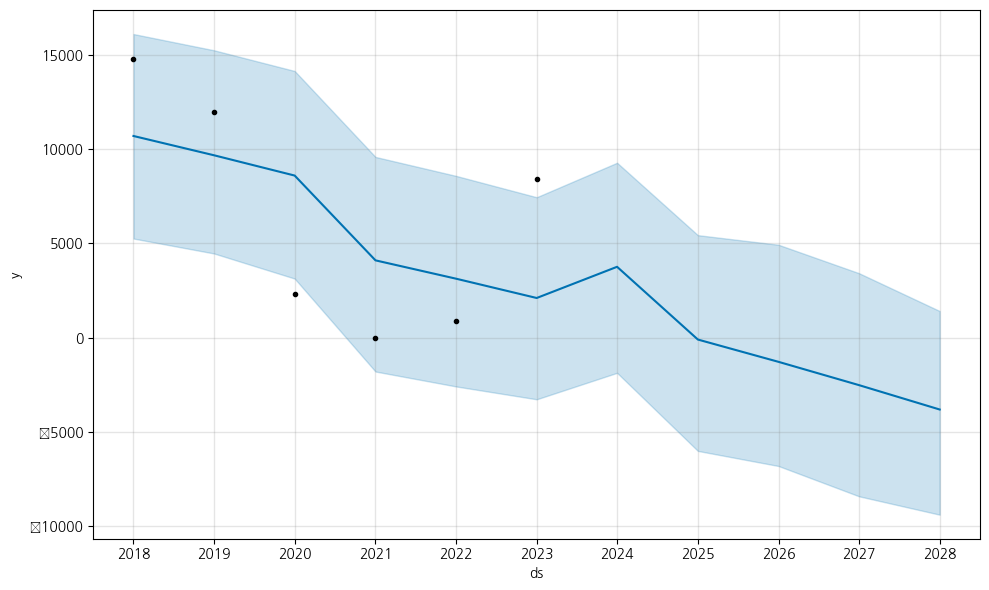

<Figure size 1000x1500 with 0 Axes>

In [11]:
#5년치 미래 예측 데이터 프레임 생성
future = m.make_future_dataframe(periods=5, freq='YE')

forecast = m.predict(future)                             #미래 값 예측
fig1 = m.plot(forecast)                                  #예측 결과 그래프 생성
plt.savefig("./chart/제주예측.png")                      #예측 그래프를 PNG 파일로 저장

#그래프 크기 조정, 표시
plt.figure(figsize=(10,15))
plt.show()

---

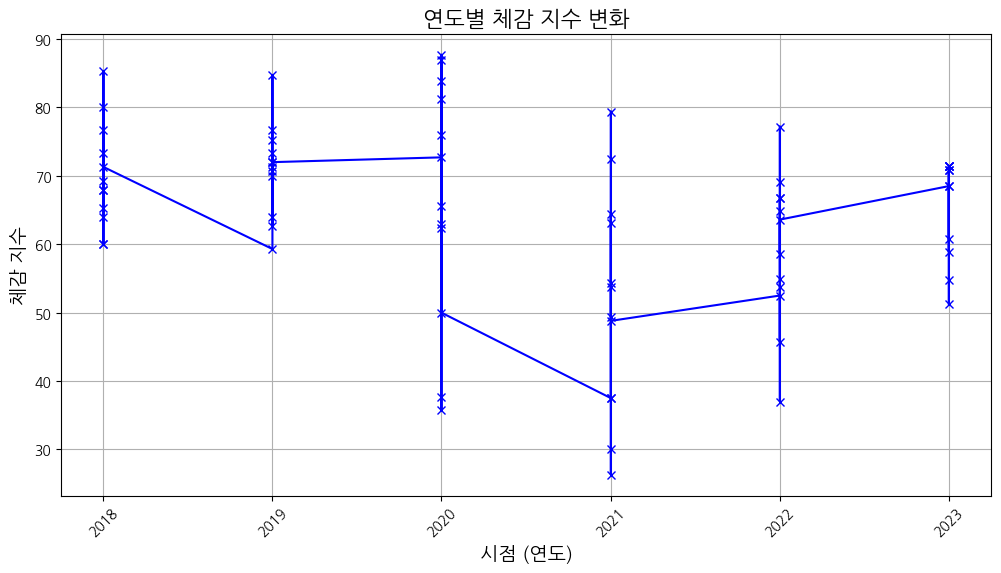

In [12]:

#원본 data2를 보호,가공 할 수 있도록 깊은 복사
ex3_data = data2.copy()

#시점을 기준으로 체감 값 합계 계산 (연도별 그룹화)
ex3_data = ex3_data.groupby('시점')['체감'].sum().reset_index(name = '체감')

#시점 컬럼을 날짜 형식으로 변환
ex3_data['시점'] = pd.to_datetime(ex3_data['시점'], format = '%Y')

#컬럼명변경
ex3_data = ex3_data.rename(columns = {'시점' : 'ds', '체감' : 'y'})

plt.figure(figsize=(12, 6))
plt.plot(ex3_data['ds'], ex3_data['y'], marker='x', color='b',linestyle='-')

# 그래프 제목 및 축 레이블 추가
plt.title("연도별 체감 지수 변화", fontsize=16)
plt.xlabel("시점 (연도)", fontsize=14)
plt.ylabel("체감 지수", fontsize=14)
plt.grid(True)  # 격자 추가
plt.xticks(rotation=45)  # X축 라벨 회전 (가독성 개선)
plt.show()


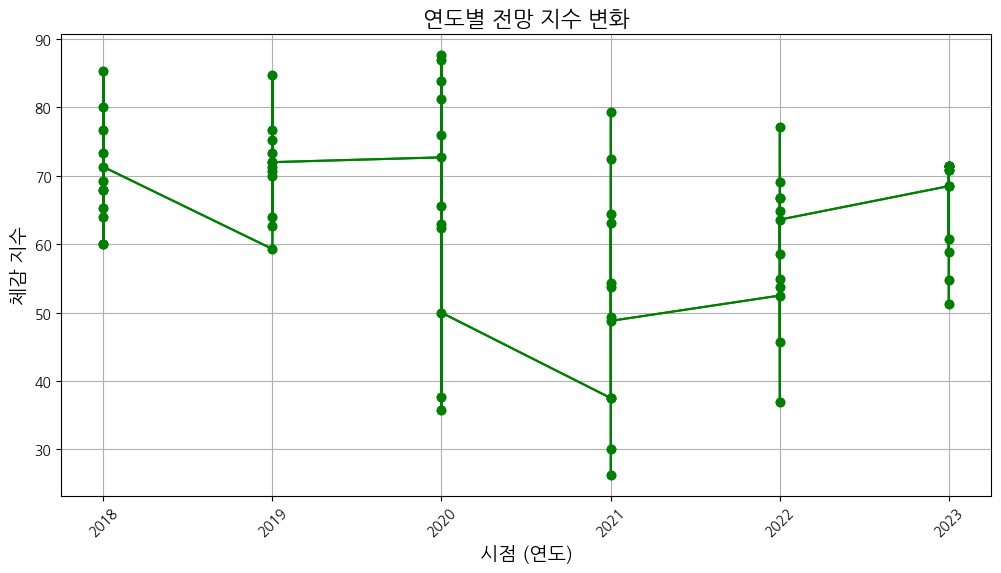

In [13]:

#원본 data2를 보호,가공 할 수 있도록 깊은 복사
ex4_data = data2.copy()

#시점을 기준으로 체감 값 합계 계산 (연도별 그룹화)
ex4_data = ex4_data.groupby('시점')['전망'].sum().reset_index(name = '전망')

#시점 컬럼을 날짜 형식으로 변환
ex3_data['시점'] = pd.to_datetime(ex4_data['시점'], format = '%Y')

#컬럼명변경
ex3_data = ex3_data.rename(columns = {'시점' : 'ds', '체감' : 'y'})

plt.figure(figsize=(12, 6))
plt.plot(ex3_data['ds'], ex3_data['y'], marker='o', color='g',linestyle='-')

# 그래프 제목 및 축 레이블 추가
plt.title("연도별 전망 지수 변화", fontsize=16)
plt.xlabel("시점 (연도)", fontsize=14)
plt.ylabel("체감 지수", fontsize=14)
plt.grid(True)  # 격자 추가
plt.xticks(rotation=45)  # X축 라벨 회전 (가독성 개선)
plt.show()


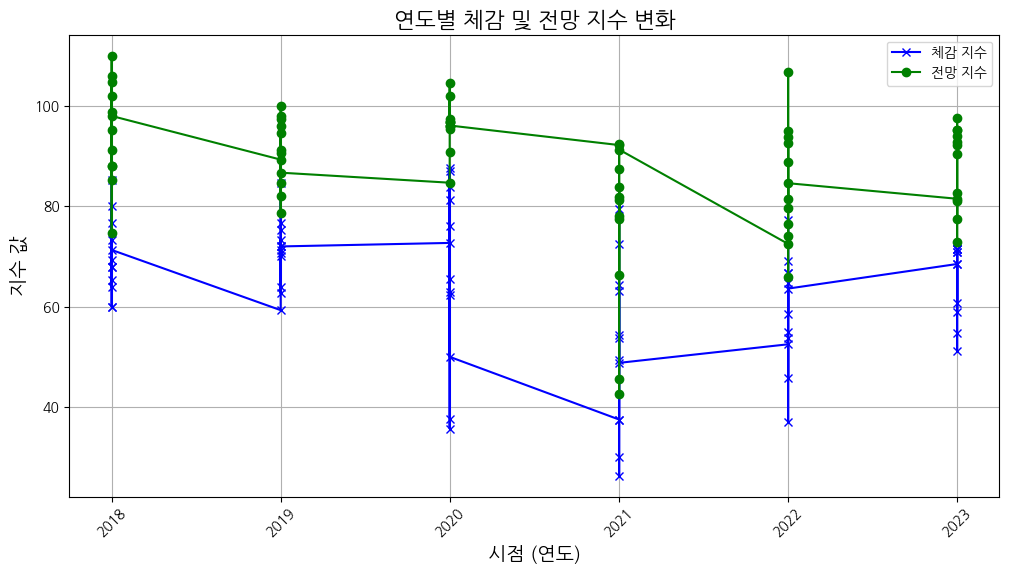

In [19]:
#원본 data2를 보호하고 가공할 수 있도록 깊은 복사
ex3_data = data2.copy()
ex4_data = data2.copy()

#시점을 기준으로 체감 값과 전망 값 합계 계산 (연도별 그룹화)
ex3_data = ex3_data.groupby('시점')['체감'].sum().reset_index(name='체감')
ex4_data = ex4_data.groupby('시점')['전망'].sum().reset_index(name='전망')

#시점 컬럼을 날짜 형식으로 변환 (YYYY → datetime)
ex3_data['시점'] = pd.to_datetime(ex3_data['시점'], format='%Y')
ex4_data['시점'] = pd.to_datetime(ex4_data['시점'], format='%Y')

#컬럼명 변경
ex3_data = ex3_data.rename(columns={'시점': 'ds', '체감': 'y'})
ex4_data = ex4_data.rename(columns={'시점': 'ds', '전망': 'y'})

#체감 지수와 전망 지수를 한 그래프에 표시
plt.figure(figsize=(12, 6))
plt.plot(ex3_data['ds'], ex3_data['y'], marker='x', color='b', linestyle='-', label="체감 지수")
plt.plot(ex4_data['ds'], ex4_data['y'], marker='o', color='g', linestyle='-', label="전망 지수")

# 그래프 제목 및 축 레이블 추가
plt.title("연도별 체감 및 전망 지수 변화", fontsize=16)
plt.xlabel("시점 (연도)", fontsize=14)
plt.ylabel("지수 값", fontsize=14)
plt.legend()                         # 범례 추가
plt.grid(True)                       # 격자 추가
plt.xticks(rotation=45)              # X축 라벨 회전 (가독성 개선)
plt.show()

In [20]:
#모델 생성 후 학습
m = Prophet()
m.fit(ex3_data)

09:01:53 - cmdstanpy - INFO - Chain [1] start processing
09:01:53 - cmdstanpy - INFO - Chain [1] done processing


C:\Dev\Lang\Python313\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


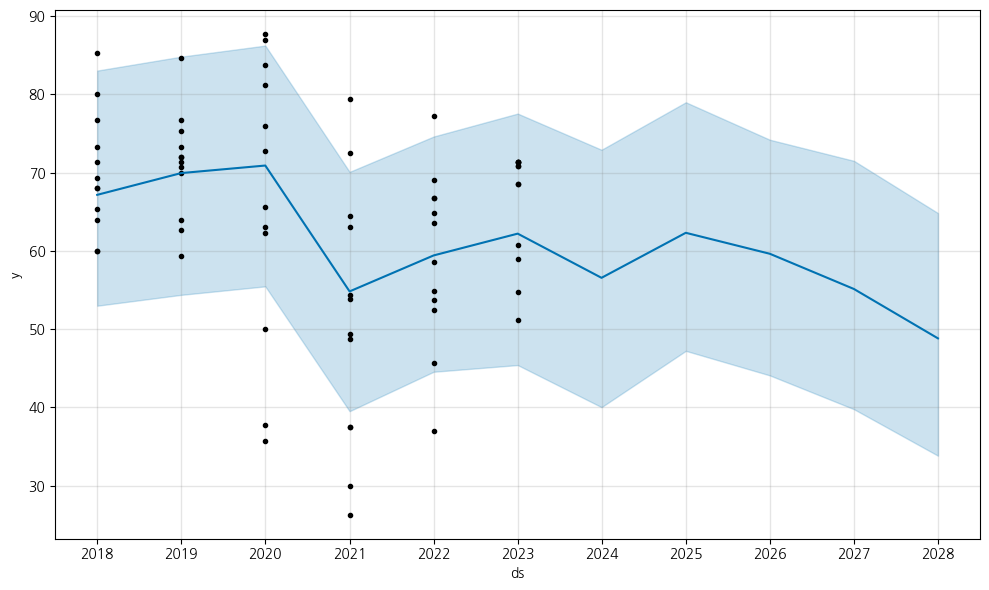

<Figure size 1000x1500 with 0 Axes>

In [21]:
#체감에 관한 5년간 미래 예측 데이터 프레임 생성
future = m.make_future_dataframe(periods = 5, freq = 'Y')
forecast = m.predict(future)
fig1 = m.plot(forecast)

plt.savefig('./chart/체감.png')
plt.figure(figsize = (10, 15))
plt.show()

In [22]:
m = Prophet()
m.fit(ex4_data)

09:01:55 - cmdstanpy - INFO - Chain [1] start processing
09:01:55 - cmdstanpy - INFO - Chain [1] done processing


C:\Dev\Lang\Python313\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


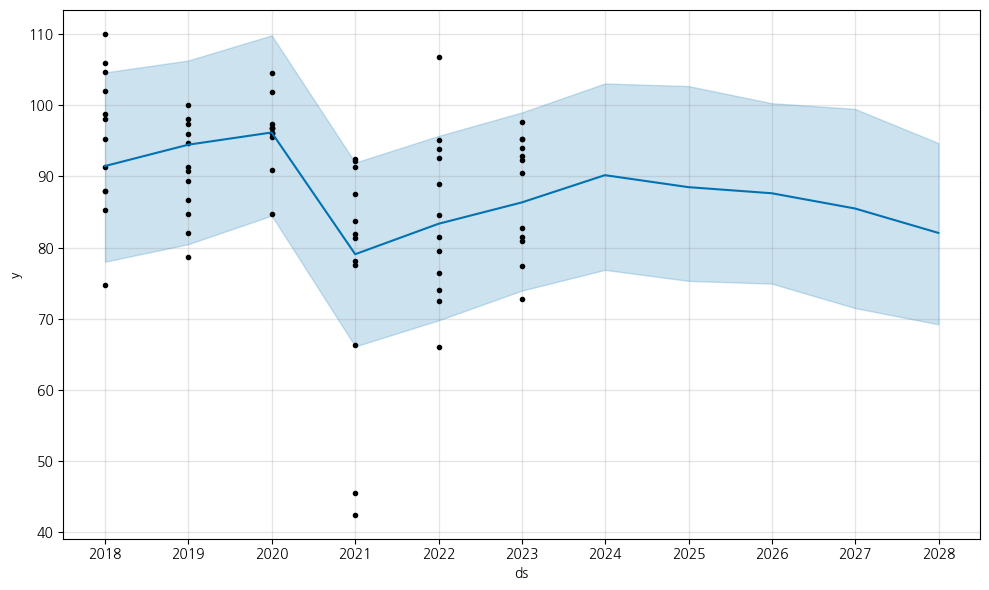

<Figure size 2000x1500 with 0 Axes>

In [23]:
#전망에 관한 5년간 미래 예측 데이터 프레임 생성
future = m.make_future_dataframe(periods = 5, freq = 'Y')
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig('./chart/전망.png')
plt.figure(figsize = (20, 15))
plt.show()

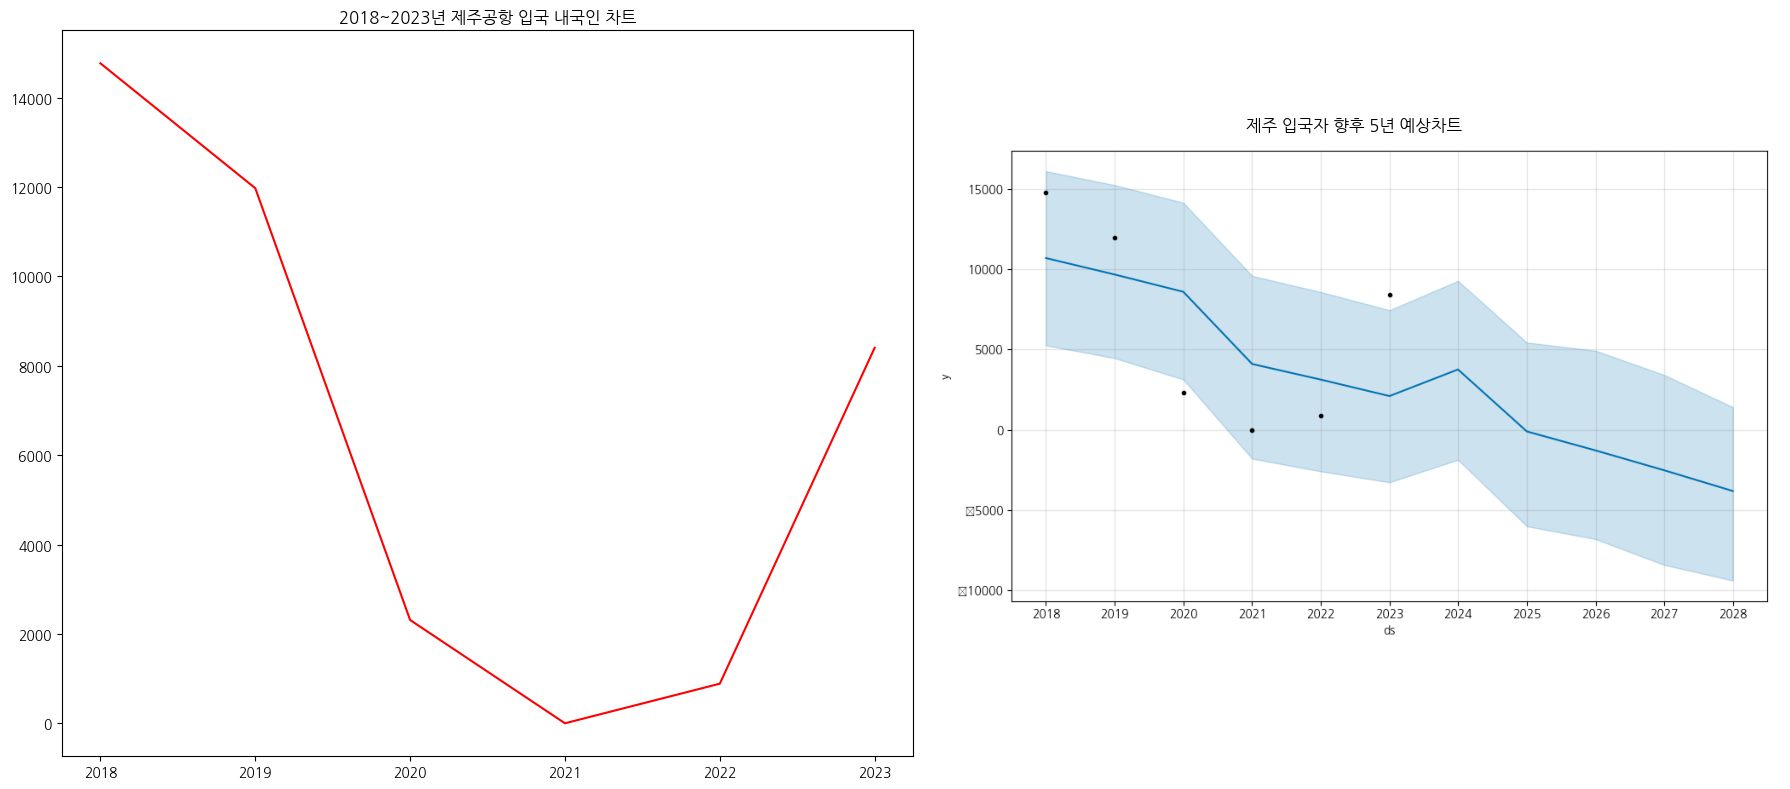

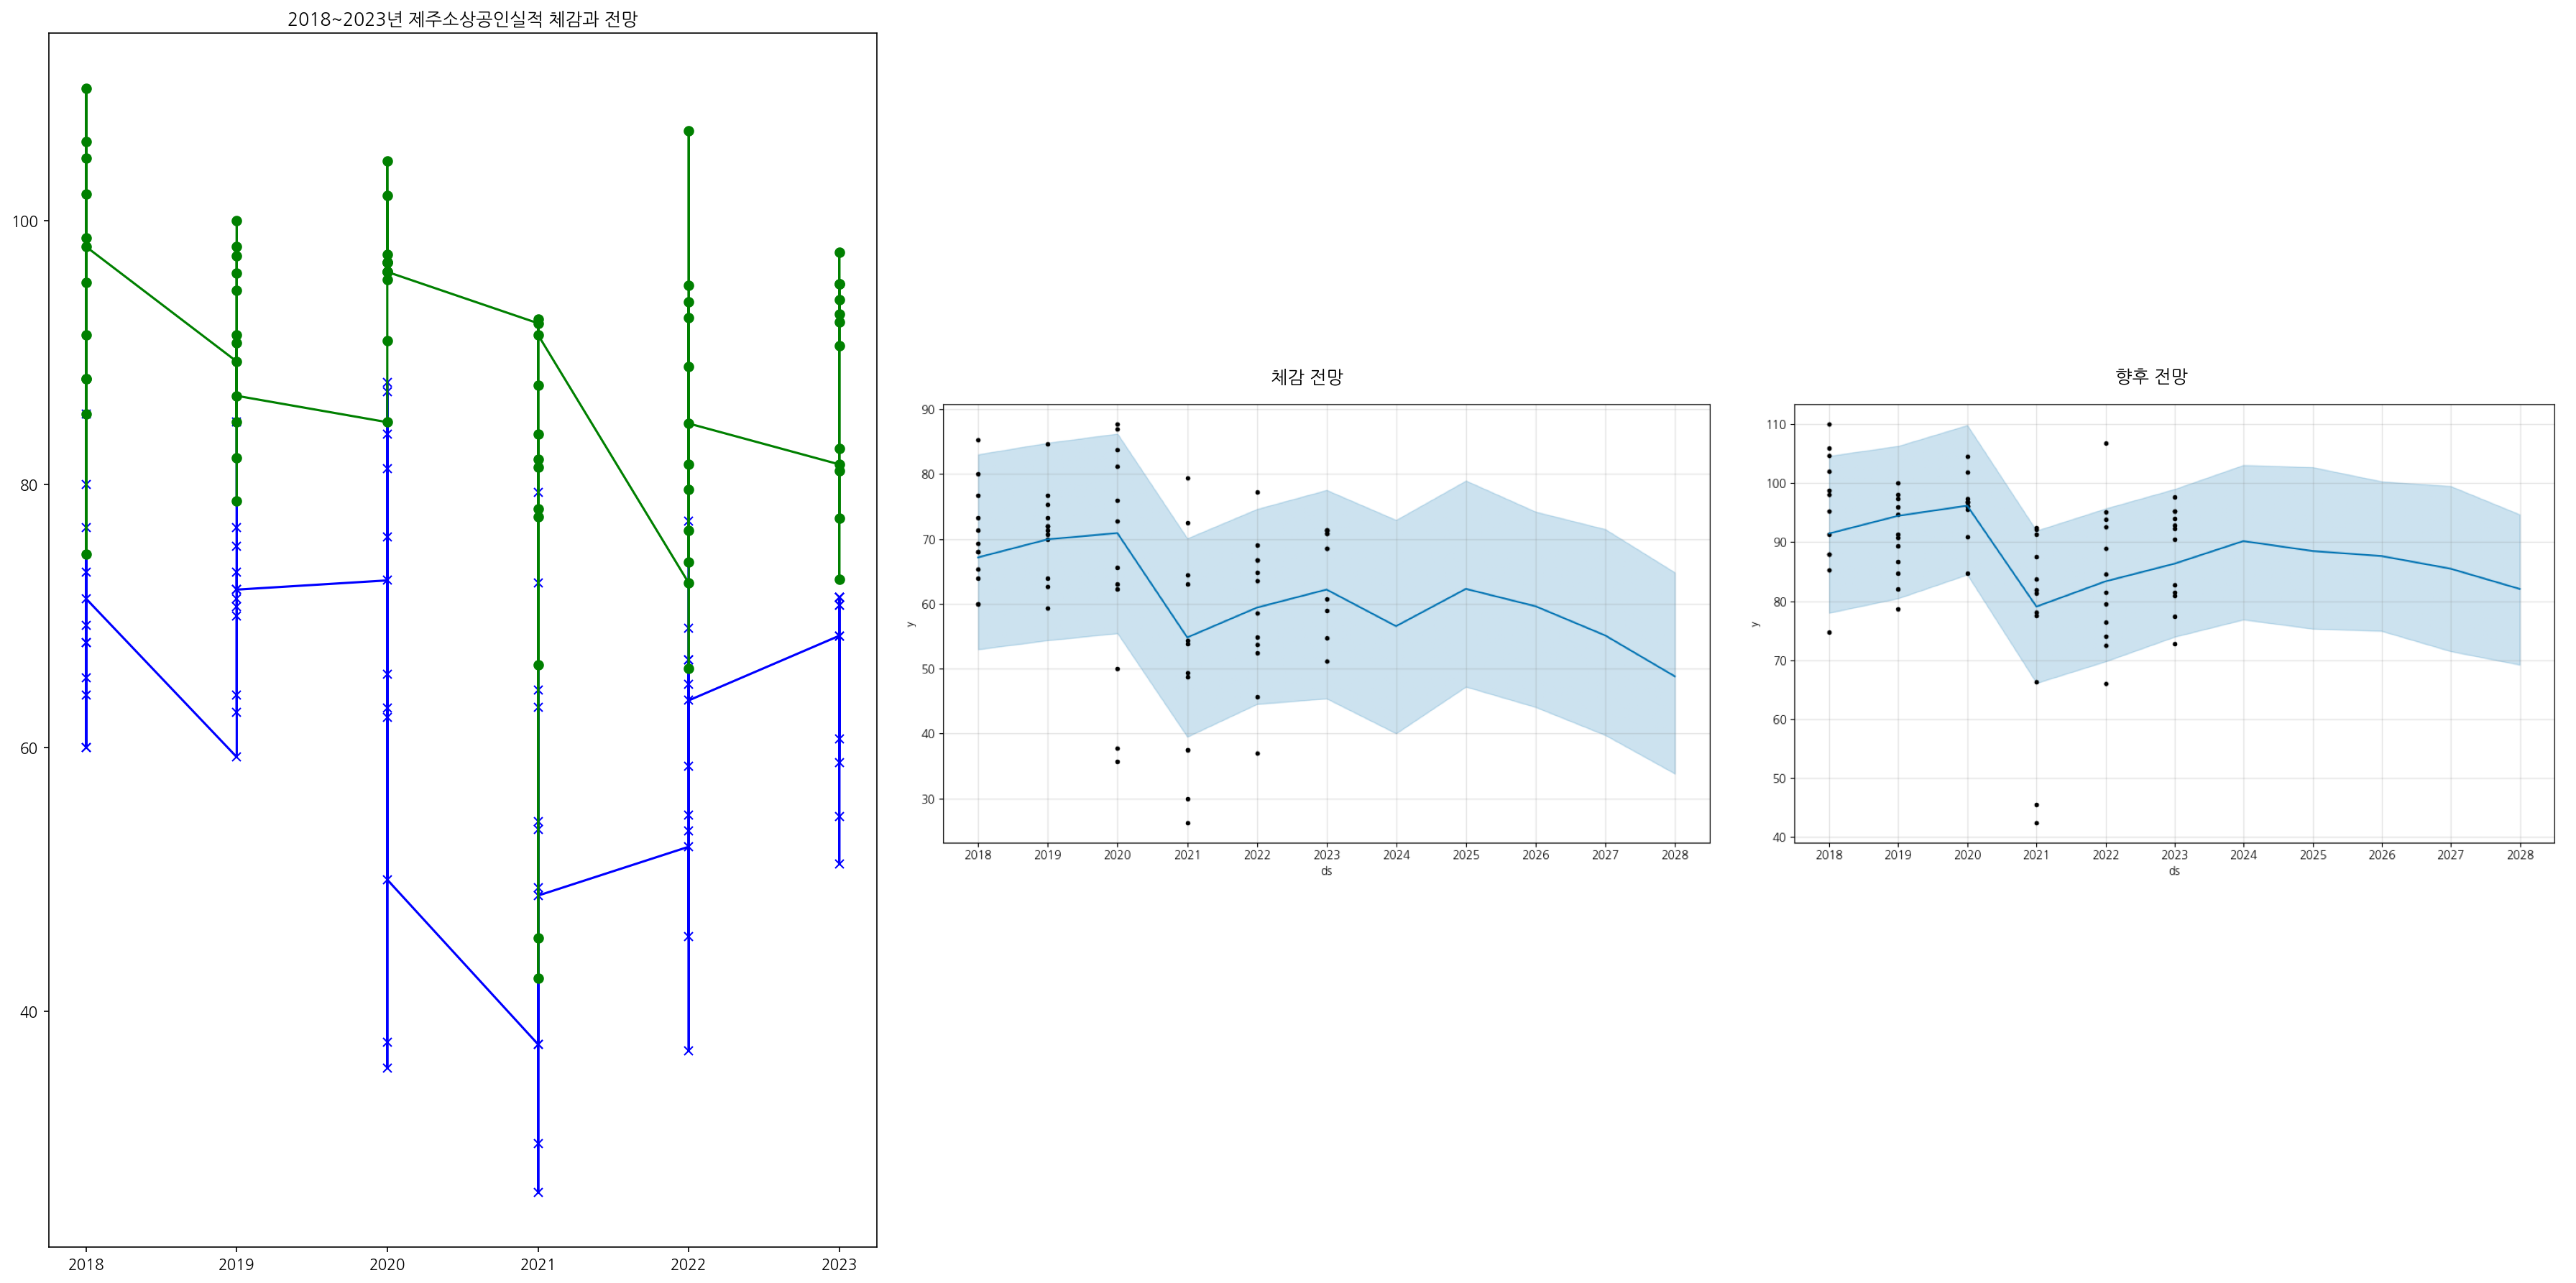

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#원본 data2를 보호하고 가공할 수 있도록 깊은 복사
ex3_data = data2.copy()

#시점을 기준으로 체감값 합계 계산 (연도별 그룹화)
ex3_data = ex3_data.groupby('시점')['체감'].sum().reset_index(name='체감')

#시점 컬럼을 날짜 형식으로 변환 (YYYY → datetime)
ex3_data['시점'] = pd.to_datetime(ex3_data['시점'], format='%Y')

#Prophet 모델을 위한 컬럼명 변경
ex3_data = ex3_data.rename(columns={'시점': 'ds', '체감': 'y'})

#위쪽 2개 그래프 (제주공항 내국인 차트 + 제주공항 내국인 입국 향후 5년 예측 차트)
fig1, axs1 = plt.subplots(1, 2, figsize=(18, 8))

#1번째 그래프 - 제주공항 입국 내국인 차트
axs1[0].plot(ex1_data['year'], ex1_data['total'], color='r')
axs1[0].set_title("2018~2023년 제주공항 입국 내국인 차트")

#2번째 그래프 - 제주공항 입국자 향후 5년 예상 차트
img = mpimg.imread("./chart/제주예측.png")
axs1[1].imshow(img)
axs1[1].axis("off")  # 축 제거
axs1[1].set_title("제주 입국자 향후 5년 예상차트")

plt.subplots_adjust(wspace=0.3)  # 그래프 간 간격 조정
plt.tight_layout()               # 그래프 요소가 겹치치 않도록 자동으로 조절하는 함수
plt.show()

#아래쪽 3개 그래프 (제주 소상공인 실적 및 전망)
fig2, axs2 = plt.subplots(1, 3, figsize=(24, 12), dpi=150)  # 크기 조정하여 가독성 향상

#1번째 그래프 - 제주 소상공인지역별 실적
axs2[0].plot(ex3_data['ds'], ex3_data['y'], marker='x', color='b', linestyle='-')
axs2[0].plot(ex4_data['ds'], ex4_data['y'], marker='o', color='g', linestyle='-', label="전망 지수")
axs2[0].set_title("2018~2023년 제주소상공인실적 체감과 전망")

#2번째 그래프 - 체감 전망
img2 = mpimg.imread('./chart/체감.png')
axs2[1].imshow(img2)
axs2[1].axis("off")
axs2[1].set_title("체감 전망")

#3번째 그래프 - 향후 전망
img3 = mpimg.imread('./chart/전망.png')
axs2[2].imshow(img3)
axs2[2].axis("off")
axs2[2].set_title("향후 전망")

plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()


## **시각화를 통한 그래프 분석**

### 2018~2023년 제주공항 입국 내국인 차트
- 2018년도에 가장 높았다가 2019년부터 입국 내국인 수가 감소하는 경향을 보인다.
- 2020년 부터 2021년까지 급격한 감소를 보이며 최하점을 찍었다.
- 2022년 부터 점차 다시 급상승 하는 모습을 보이며, 2023년에는 증가하는 모습을 나타낸다.



### 제주 소상공인실적 차트
- *BSI는 경기실사지수(Business Survey Index)로 100초과이면 호전, 100미만이면 악화를 나타냄*
- *BSI = [(매우감소 응답빈도 * 0) + (다소감소 응답빈도 * 50) + (동일 응답빈도 * 100) +(다소증가 응답빈도 * 150) + (매우증가 응답빈도 * 200)] / (총응답업체수)*

- 2018년 부터 2020년 까지 좌하향 하다가, 2021년도에 급격하게 감소 하고, 최하점을 찍었다.
- 2022년부터 점차적으로 상승하는 모습을 보인다.

### Prophet을 이용한 향후 5년간 예측 데이터 차트

#### 제주 입국자 향후 5년 예상 차트
-  2023년부터 2024년까지 잠깐 상승하다가, 2024년부터 2025년까지 급감 후 ,2028년까지 좌하향 하는 모습을 보인다.

#### 체감 전망과 향후 전망
- 비슷한 그래프 모양을 보여주며, 향후 전망에 비해 체감 전망이 큰 폭으로 좌하향 하고 있다.

## **분석 결과 해석**

제주 공항 입국 내국인 차트와 제주 소상공인 실적 차트를 비교하여 보면, 비슷한 모습을 볼 수 있다.

2018 ~2020년도는 하락 추세가 보인다. 이 시기에는 사회적, 경제적 요인이 있었을 것으로 예상된다.
2020 ~2021년은 코로나 팬데믹으로 인한 급감을 보인다. 이로인해 관광 산업이 모두 급감되고, 이것이 지역 소상공인경기 체감으로 이어진다.
2022 ~2023년은 회복세를 보이며, 2023년에는 입국 내국인이 더 크게 늘어나면서, 여행 수요가 증가해 회복세로 전환되는 모습을 볼 수 있다. 마찬가지로 소상공인 체감 이나 전망 수치도 올라 갔다.

하지만 Prophet을 이용한 향후 5년간 예측한 데이터에서는 제주공항 내국인 입국과 제주 소상공인 실적 차트 둘다 감소할 것으로 추정이 된다는 결론이 나왔다.
3개의 예측 그래프 모두 2023년~2024년에는 조금 증가 하였다가, 2028년 까지 서서히 좌하향 하는 모습을 보여주는데 입국 차트와 실적 차트들이 비슷한 그래프 모양으로 보여주고 있다.

# **결론**
위의 그래프들을 분석 하여 보면 제주공항 내국인 입국은 제주 소상공인 실적 차트 는 서로 연관이 있는 것으로 볼 수 있다.
이는 제주공항 내국인 입국(국내여행)이 제주도의 경기와 관련이 있으며 제주도는 관광지로 발달되있다는 점과 여행 산업면에서 경기가 크게 작용을 한다는 점을 알 수 있다. 하지만 향후 5년간 하향하는 그래프를 보여주므로, 제주도 소상공인들이나 정부는 국내 관광객 유치를 위한 노력과 전략이 필요할 것으로 보인다.
